
# Project: Investigate a Dataset - [tmdb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### TMDb movie dataset

> The TMDB movie dataset contains 21 columns and 10866 rows, it has info about more than 10K movies, their revenue, budget etc..  


### Questions to be analyzed from the dataset:

#1) Which movie has the highest screen runtime?
#2) Which movie had the highest and lowest net income?
#3) Which movie had the lowest/ highest budget?
#4) What is the most used genres?
#5) Who is The leading actor Who've appeared in most movies?
#6) Which director has the highest net-income movie?


In [1]:
# Use this cell to set up import statements for all of the packages that you
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# shape shows us the table in tuble form 
df.shape

(10866, 21)

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



# Observation

As shown in min,25% and 50% that budget and revenue colmuns has zeros which doesn't make sense, so I will remove the budget and revenue columns from the data set.


# Data Cleaning

#1) I'm going to drop the columns that I'm not going to use as they doen't benfit the analysis.
#2) Columns that i will remove [imdb_id , popularity , homepage , tagline , keywords , overview , release_date , budget_adj , revenue_adj , vote_average , vote_count] 
#3) Remove duplicate data
#4) remove movies that has zero budget.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related cobservationsode cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [7]:
# I'm going to drop the columns that I'm not going to use 
# imdb_id , popularity , homepage , tagline , keywords , overview , release_date , budget_adj , revenue_adj 

df.drop(["imdb_id" , "popularity" , "homepage" , "tagline" , "keywords" , "overview" , "release_date" , "budget_adj" , "revenue_adj" ], axis=1 , inplace=True)

In [8]:
df.head()

,id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
id                      10866 non-null int64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 1018.8+ KB



# Observations

The following columns has missing values: cast / director / genres / production_companies  

# Question 1

Which movie has the highest screen runtime?

In [10]:
filt = df['runtime'] == 0
#filt insetad of filter
#filt to remove zeros from runtime so that we can reach accurate number 

In [11]:
df.loc[~filt].sort_values("runtime") 
#I have used tilde to negate filt and remove zeros to show the movie with the highest runtime.

,id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
7905,13924,0,0,The Adventures of AndrÃ© and Wally B.,NaN,Alvy Ray Smith,2,Animation,Lucasfilm|Pixar Animation Studios,32,5.3,1984
10754,3171,0,0,Bambi Meets Godzilla,NaN,Marv Newland,2,Animation|Comedy,NaN,12,5.6,1969
4890,126909,0,0,Cousin Ben Troop Screening,Jason Schwartzman,Wes Anderson,2,NaN,NaN,14,7.0,2012
4883,142563,0,0,Fresh Guacamole,NaN,PES,2,Animation,NaN,29,7.9,2012
10550,13925,0,0,Luxo Jr.,NaN,John Lasseter,2,Animation|Family,Pixar Animation Studios,81,7.3,1986
5934,200204,0,0,Prada: Candy,Peter Gadiot|Rodolphe Pauly|LÃ©a Seydoux,Wes Anderson|Roman Coppola,3,NaN,NaN,27,6.9,2013
3298,140656,0,0,MamÃ¡,Victoria Harris|Irma Monroig|Berta Ros,Andy Muschietti,3,Horror,Toma 78,11,6.0,2008
3350,105759,0,0,The Black Hole,Napoleon Ryan,Philip Sansom|Olly Williams,3,Comedy|Crime,NaN,13,7.1,2008
1112,264170,0,0,Batman: Strange Days,Kevin Conroy|Brian George|Tara Strong,Bruce Timm,3,Action|Animation,DC Comics,20,7.6,2014
5399,43629,0,0,Doodlebug,Jeremy Theobald,Christopher Nolan,3,Fantasy|Mystery,NaN,47,6.5,1997


In [12]:
# Will run the Highest and smallest screen runtime to see the data.
df.nlargest(10,"runtime")

,id,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
3894,125336,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,Mark Cousins,900,Documentary,NaN,14,9.2,2011
4041,150004,0,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,877,Science Fiction,DreamWorks,38,6.8,2002
2722,331214,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,Phil Alden Robinson|Richard Loncraine|Mikael S...,705,Action|Drama|War,HBO,313,8.0,2001
6176,42044,0,0,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,Claude Lanzmann,566,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,16,8.3,1985
6181,18729,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,561,Drama|History|Western,NaN,17,6.0,1985
6894,192040,0,0,Planet Earth,David Attenborough,Alastair Fothergill,550,Documentary,NaN,65,7.6,2006
2214,189197,120000000,0,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,183,7.8,2010
3356,118309,0,0,John Adams,Paul Giamatti|Laura Linney|Stephen Dillane|Tom...,Tom Hooper,501,History|Drama,NaN,33,6.6,2008
1865,220903,0,0,Life,David Attenborough|Oprah Winfrey,Martha Holmes|Simon Blakeney|Stephen Lyle,500,Documentary,British Broadcasting Corporation (BBC),24,7.0,2009
3141,54102,0,0,Generation Kill,Alexander SkarsgÃ¥rd|James Ransone|Lee Tergese...,Susanna White|Simon Cellan Jones,470,Drama|War|History,Company Pictures,28,6.6,2008


In [13]:
df.loc[3894,'original_title':'runtime']

original_title                        The Story of Film: An Odyssey
cast              Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
director                                               Mark Cousins
runtime                                                         900
Name: 3894, dtype: object

# The Answer to first Question 

#Q: Which movie has the highest screen runtime?
#A: The movie with the highest screen runtime is 'The Story of Film: An Odyssey'

# Question 2

Which movie had the highest and lowest net income? , and to answer this question we need to remove all the budget revenue columns that has zeros in it, then we should subtract the revenue from budget to get the net income.	

In [14]:
# I have used tilde to remove zeros from budget and revenue so that i can have a valid calcualtion
df = df.loc[~((df["budget"] == 0 ) & (df["revenue"] == 0 ) & (df["runtime"] == 0) )]
df.dropna(inplace = True)

In [15]:
#Add new column name "net_profit"
# net_profit = "revenue" - "budget"
df.insert(3,'net_profit',df['revenue'] - df['budget'])

#previewing the change in the dataset
df.columns

Index(['id', 'budget', 'revenue', 'net_profit', 'original_title', 'cast',
       'director', 'runtime', 'genres', 'production_companies', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9761 entries, 0 to 10865
Data columns (total 13 columns):
id                      9761 non-null int64
budget                  9761 non-null int64
revenue                 9761 non-null int64
net_profit              9761 non-null int64
original_title          9761 non-null object
cast                    9761 non-null object
director                9761 non-null object
runtime                 9761 non-null int64
genres                  9761 non-null object
production_companies    9761 non-null object
vote_count              9761 non-null int64
vote_average            9761 non-null float64
release_year            9761 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 1.0+ MB


In [17]:
df.nsmallest(5,'net_profit')

,id,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2244,46528,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010
5508,57201,255000000,89289910,-165710090,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149,Action|Adventure|Western,Walt Disney Pictures|Jerry Bruckheimer Films|I...,1607,6.0,2013
2069,7978,150000000,0,-150000000,The Wolfman,Benicio del Toro|Anthony Hopkins|Emily Blunt|H...,Joe Johnston,102,Horror|Thriller|Drama,Universal Pictures|Stuber Productions|Relativi...,299,5.4,2010
2214,189197,120000000,0,-120000000,The Pacific,James Badge Dale|Joseph Mazzello|Jon Seda|Asht...,Jeremy Podeswa|Tim Van Patten|David Nutter|Gra...,540,War|Drama|Action|Adventure|History,Playtone|HBO|DreamWorks Television,183,7.8,2010
7031,10733,145000000,25819961,-119180039,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137,Western|History|War,Imagine Entertainment|Touchstone Pictures,60,5.9,2004


In [18]:
df.nlargest(5,"net_profit")

,id,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
1386,19995,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,8458,7.1,2009
3,140607,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
5231,597,200000000,1845034188,1645034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,4654,7.3,1997
0,135397,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
4,168259,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


# Answer to the second Question 

#Q: Which movie had the highest and lowest net income? 
#A: The movie with the highest net income is 'Avatar'
And the movie with the lowest net income is 'The Warrior's Way'

# Question 3

Which movie has the lowest/ highest budget?

In [19]:
filt = df['budget'] == 0

In [20]:
filt.dropna(inplace = True)

In [21]:
df.loc[~filt].sort_values("budget")

,id,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
3581,59296,1,1378,1377,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,55,5.3,2011
2618,39964,1,100,99,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,14,4.8,1999
3065,12689,1,0,-1,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,Gurinder Chadha,100,Comedy|Drama|Family|Romance,Paramount Pictures|Nickelodeon Movies|Stella-d...,146,6.5,2008
1151,287524,1,0,-1,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,95,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,15,4.1,2014
8944,14373,2,16,14,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,88,Action|Crime|Thriller,Cannon Films,27,5.6,1982
3765,91551,3,0,-3,Death of a Superhero,Andy Serkis|Thomas Brodie-Sangster|Michael McE...,Ian Fitzgibbon,97,Animation|Drama,Bavaria Pictures|Grand Pictures|Picture Circle,30,6.5,2011
10050,20701,3,16,13,Tales from the Darkside: The Movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,John Harrison,93,Fantasy|Horror|Comedy,Paramount Pictures|Laurel Productions|Darkside...,37,5.8,1990
2398,39356,3,43,40,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,Taika Waititi,87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,26,7.3,2010
1313,286101,5,0,-5,Des Lendemains Qui Chantent,Pio MarmaÃ¯|Laetitia Casta|Ramzy Bedia|Gaspard...,Nicolas Castro,94,Comedy,UGC Distribution,13,6.0,2014
8235,25066,6,11,5,Tales from the Hood,Clarence Williams III|Corbin Bernsen|David Ala...,Rusty Cundieff,98,Horror|Thriller,Savoy Pictures,13,5.1,1995


In [22]:
df.nlargest(5,"budget") 

,id,budget,revenue,net_profit,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
2244,46528,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,74,6.4,2010
3375,1865,380000000,1021683000,641683000,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,3180,6.3,2011
7387,285,300000000,961000000,661000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2626,6.8,2007
14,99861,280000000,1405035767,1125035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,Marvel Studios|Prime Focus|Revolution Sun Studios,4304,7.4,2015
6570,1452,270000000,391081192,121081192,Superman Returns,Brandon Routh|Kevin Spacey|Kate Bosworth|James...,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,DC Comics|Legendary Pictures|Warner Bros.|Bad ...,834,5.3,2006


# Answer to the third Question 

#Q: Which movie has the lowest/ highest budget?
#A: The movie with the highest budget is 'The Warrior's Way'. The movie with the lowest budget is 'Love, Wedding, Marriage'

# Question 4

What is the most used genres?

In [23]:
# Genres column is not sepreated, so it needs to be filtered first so that i can count the most used genres in movies.
genres = df["genres"].str.split("|", expand=True)

In [24]:
genres.head()

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [25]:
#From the pervious code, columns head are not clear, so i will rename it so that i can use it.
genres.rename(columns = {0:"Column",1:"Column1",2:"Column2",3:"Column3",4:"Column4"}, inplace = True)

In [26]:
genres.head()

,Column,Column1,Column2,Column3,Column4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None


In [27]:
genres.dropna(inplace = True) #Will make sure to remove all the null values from the DataFrame

In [28]:
split_genres = df['genres'].str.split('|', expand=True).unstack().value_counts() 
#I used the unstack here so that i can unstack the genres from row to column, and used value_counts so that i can have a number for each genre

In [29]:
split_genres

Drama              4363
Comedy             3429
Thriller           2746
Action             2235
Romance            1568
Horror             1522
Adventure          1383
Crime              1300
Science Fiction    1136
Family             1094
Fantasy             839
Mystery             773
Animation           617
Music               338
Documentary         315
History             306
War                 258
Western             160
TV Movie            130
Foreign             120
dtype: int64

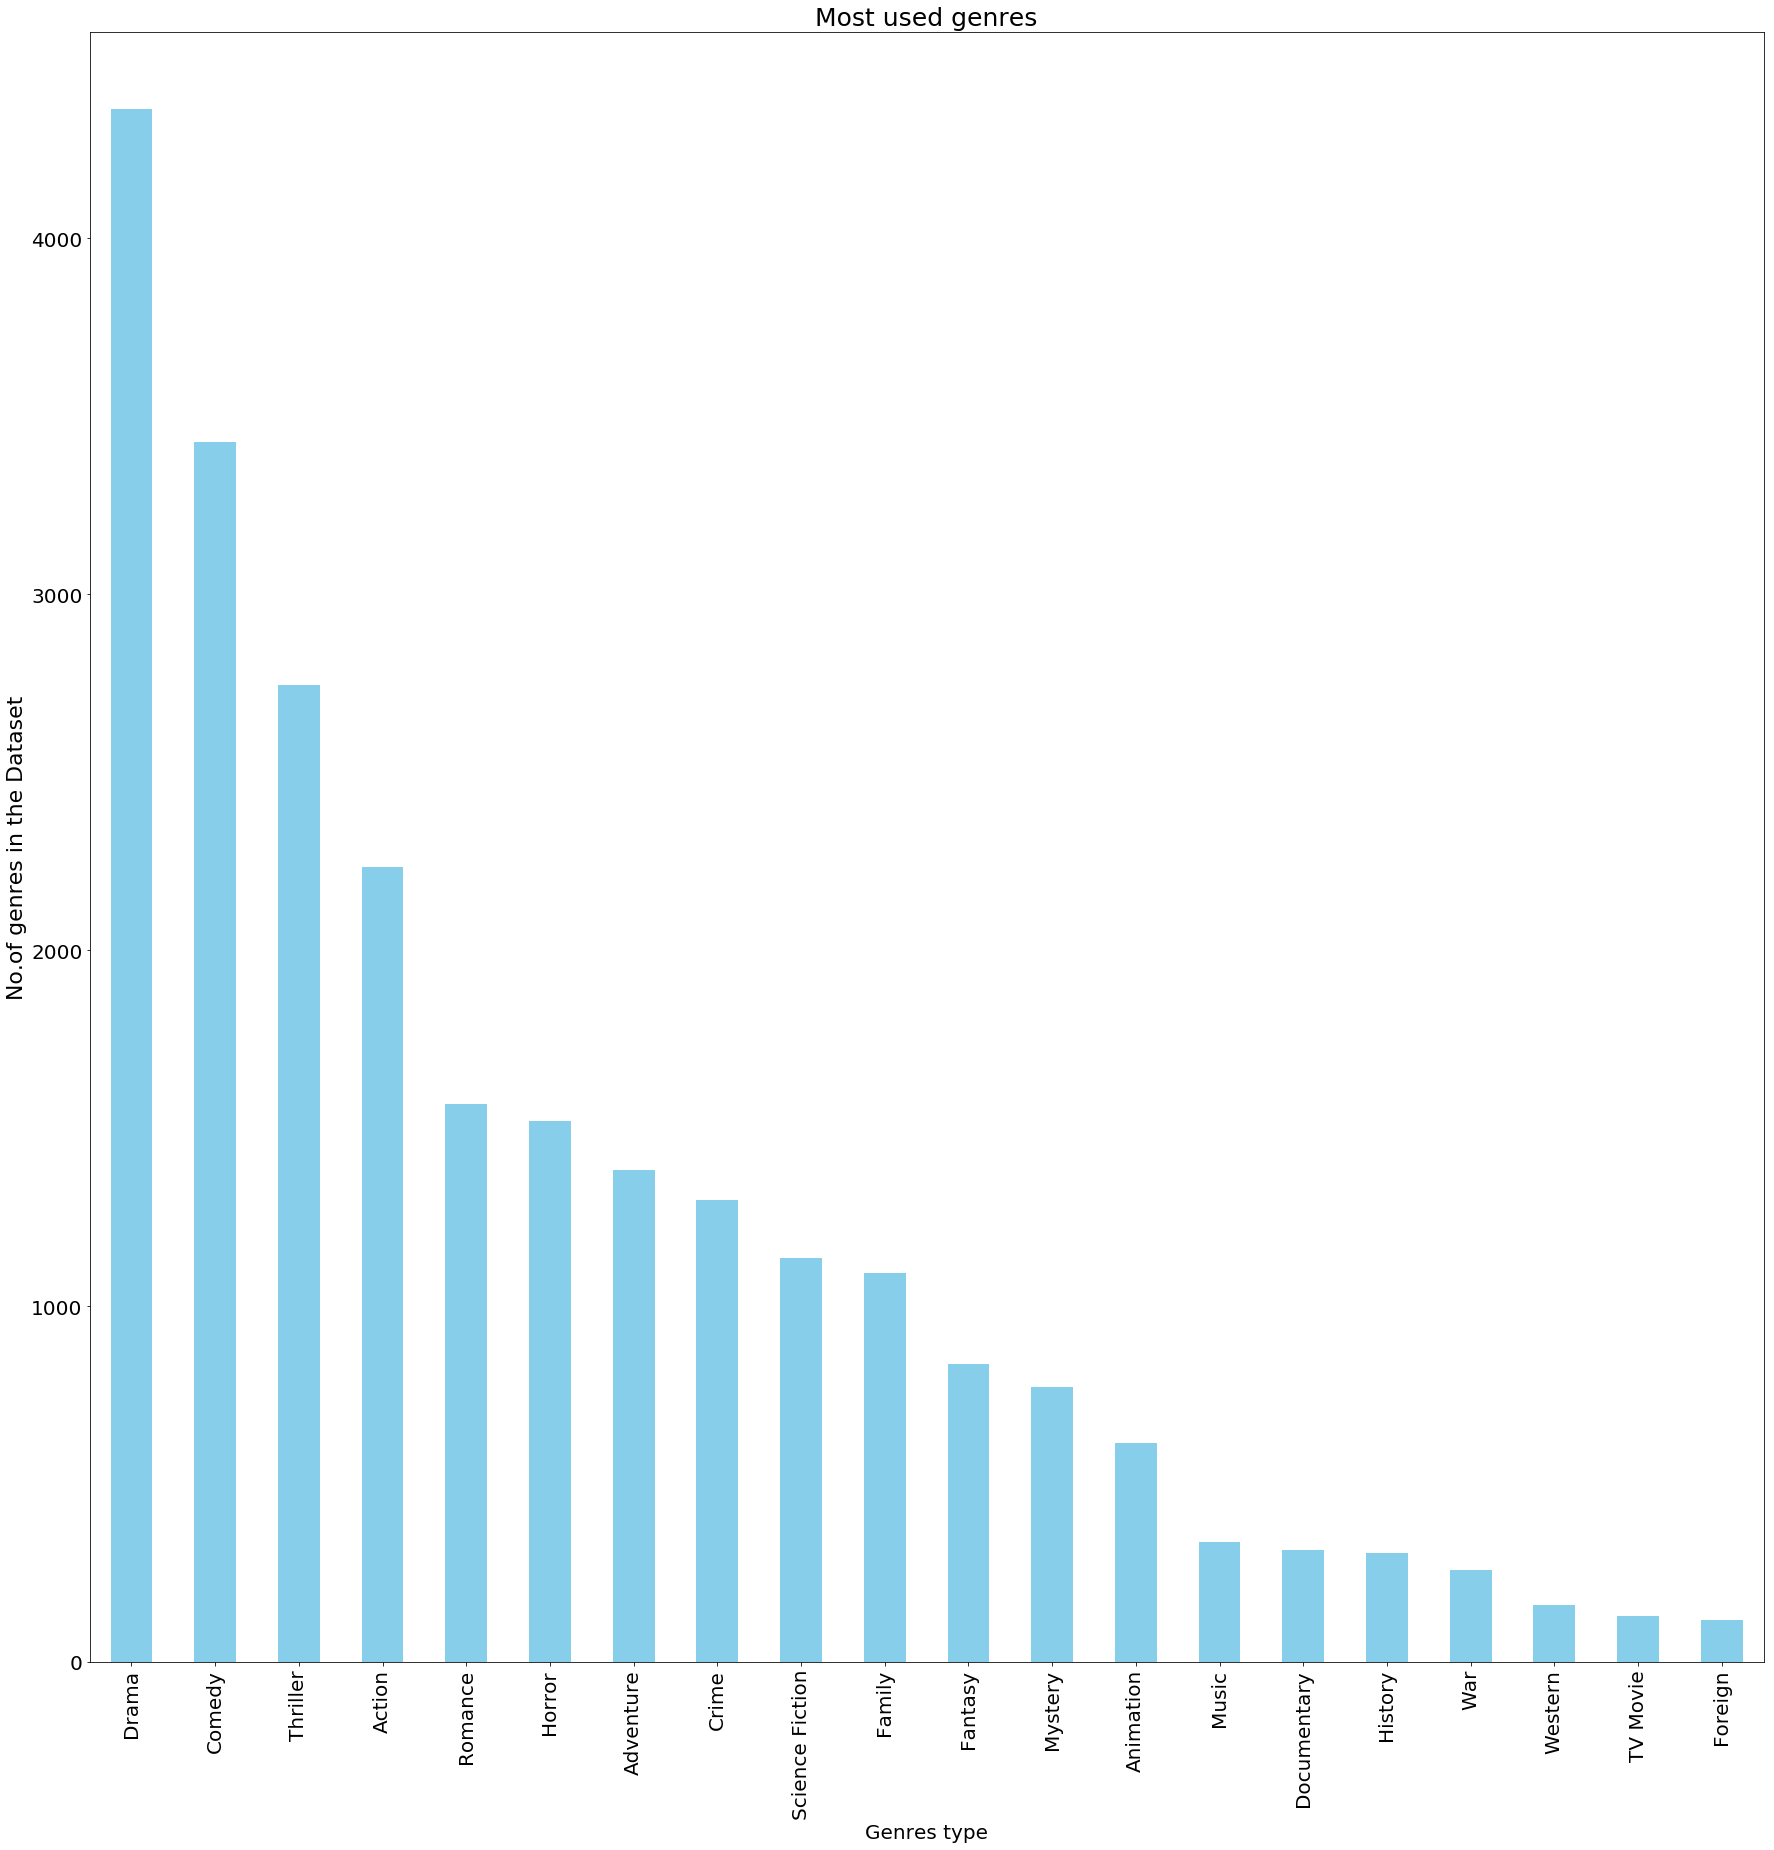

In [30]:
#plot bar for the most used genres

#giving the figure size(width, height)
plt.figure(figsize=(30,30))

#Name the graph title
plt.title('Most used genres', fontsize=25)

#Rename x-axis & y-axis 
plt.xlabel('Genres type', fontsize = 20)
plt.ylabel('No.of genres in the Dataset', fontsize=22)


#giving a bar plot
split_genres.plot.bar(color = 'skyblue', fontsize = 20)

#Show plot
plt.show()

In [31]:
#From the bar chart before it is clear that the most used genres in movies is Drama

# Answer to the forth Question 

#Q: What is the most used genres?
#A: the most used genres is 'Drama'

# Question 5

Who is The leading actor Who've appeared in most movies?

In [32]:
# cast column is not sepreated, so it needs to be filtered first so that i can count the most used genres in movies.
cast = df["cast"].str.split("|", expand=True)

In [33]:
#From the pervious code, columns head names are not clear, so i will rename it so that i can use it.
cast.head()

,0,1,2,3,4
0,Chris Pratt,Bryce Dallas Howard,Irrfan Khan,Vincent D'Onofrio,Nick Robinson
1,Tom Hardy,Charlize Theron,Hugh Keays-Byrne,Nicholas Hoult,Josh Helman
2,Shailene Woodley,Theo James,Kate Winslet,Ansel Elgort,Miles Teller
3,Harrison Ford,Mark Hamill,Carrie Fisher,Adam Driver,Daisy Ridley
4,Vin Diesel,Paul Walker,Jason Statham,Michelle Rodriguez,Dwayne Johnson


In [34]:
cast.dropna(inplace = True) #Will make sure to remove all the null values from the DataFrame

In [35]:
#From the pervious code, columns head are not clear, so i will rename it so that i can use it.
cast.rename(columns = {0:"Column",1:"Column1",2:"Column2",3:"Column3",4:"Column4"}, inplace = True)

In [36]:
#I used the unstack here so that i can unstack the cast from row to column, and used value_counts so that i can have a number for each genre
split_cast = df['cast'].str.split('|', expand=True).unstack().value_counts() 

In [37]:
split_cast.head()

Robert De Niro       72
Samuel L. Jackson    70
Bruce Willis         62
Nicolas Cage         61
Michael Caine        52
dtype: int64

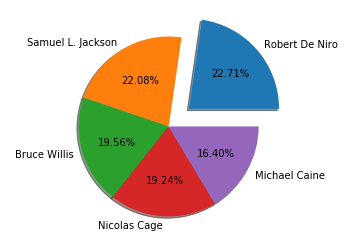

In [38]:
#Will use the pie chart for the top ten actors

Top_five_actors = split_cast.head(5).values
Actors_names = split_cast.head(5).index
separate = [0.3, 0, 0, 0, 0] # explode only the 1st slice (''Robert De Niro')

#Plotting
#Shadow and autopct are added to make the chart clear and to add info inside the chat itself
plt.pie(Top_five_actors, labels = Actors_names, explode = separate, shadow = True, autopct='%.2f%%')
plt.axis('equal')  # Will use Equal as it ensures that pie is drawn as a circle.

#Show the plot
plt.show() 

In [39]:
#From the data above The leading actor Who've appeared in most movies is 'Robert De Niro'

# Answer to the fifth Question 

#Q: Who is The leading actor Who've appeared in most movies?
#A: the most leading actor is 'Robert De Niro'

# Question 6

Which director has the highest net-income movie and vote average?

In [40]:
# I used group by to know the director with the highest net income.
# and i used the aggreagte function after group by to connect the director name with the net income and vote average. 
Top_director = df.groupby("director", sort=False, group_keys=True).agg({"net_profit":"sum","vote_average":"mean"}).sort_values(by="net_profit", ascending=False)

In [41]:
Top_director.head()

,net_profit,vote_average
director,,
Steven Spielberg,7428613772,6.824138
Peter Jackson,5196468949,7.000000
James Cameron,5081849077,6.844444
Michael Bay,3557208171,6.327273
David Yates,3379295625,7.400000


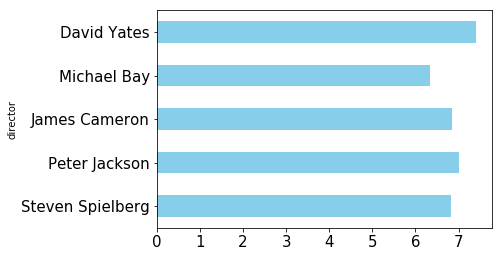

In [42]:
#plot for director with the highest vote_average
Top_director.head()["vote_average"].plot.barh(color = 'skyblue', fontsize = 15)

#Show plot
plt.show()

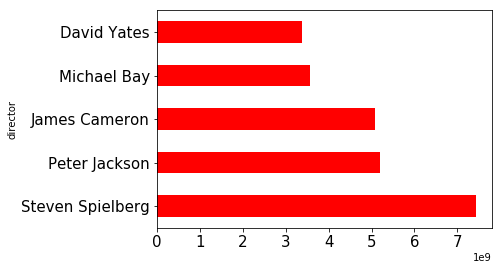

In [47]:
#plot for director with the highest vote_average
Top_director.head()["net_profit"].plot.barh(color = 'red', fontsize = 15)

#Show plot
plt.show()

# Answer to the sixth Question 

#Q:Which director has the highest net-income movie and vote average?
#A: the director who has the highest net-income movie and vote average is 'Steven Spielberg'

<a id='conclusions'></a>
## Conclusions

The data set is very rich with info. And from this data we can understand the movie industry back at the time.
We can understand which genre is most used during that time, and from the data we can understand that Darma is the most used genre. Also the data can tell us the leading actors at that time, which was no surprise was Robert De Niro, i believe he is very famous and can act in many roles. Also data showed us movies with lowest and highest budget and they were 'The Warrior's Way' with highest budget and The movie with the lowest budget was 'Love, Wedding, Marriage'.

Also data told us the highest income movie which were 'Avatar' The movie with the highest net income is
And the movie with the lowest net income is 'The Warrior's Way, kowing that both are Action movies not Drama.

Also data showed us that in movie industry, production companies can produce a movie with a runtime euqal to 900 mins which equals to 15 hours of runtime. I believe it takes a very patient fan to watch this movie "The Story of Film: An Odyssey"


Limitations I faced is that the dataset contains null and zero values in many columns, which made my filter and cleaning hard on me. Also it was clear that the data provided is out dated, which feels like you are dealing with old data and you can not relate to it that much.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0